## Import packages

In [1]:
# Enable auto reloading modules (used because of custom local modules)
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import pickle
import os
import glob
from moviepy.editor import VideoFileClip, clips_array, CompositeVideoClip
from IPython.display import HTML

# Custom local modules
import utils
import ImageFunctions as imgf
import LaneDetector as ld
from Pipeline import Pipeline

%matplotlib inline

## Directories and constants

In [3]:
output_images_dir = os.path.join('..', 'output_images')
test_images_dir = os.path.join('..', 'test_images')
test_videos_dir = os.path.join('..')
test_videos = [os.path.join(test_videos_dir, fname) for fname in os.listdir(test_videos_dir) if fname.endswith('.mp4')]

cal_data_file = 'calibration.pickle' # file where to save the distortion coefficients

## Setting up pipeline

In [4]:
def create_pipeline():
    return Pipeline(camera_calibration_file=cal_data_file, n_windows=9, margin=80, min_pix=40, poly_margin=50)

## Processing images through pipeline

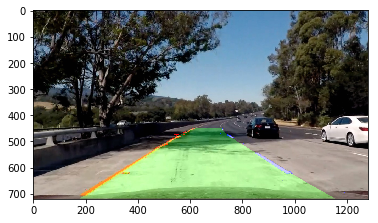

In [5]:
test_image = mpimg.imread(os.path.join(test_images_dir, 'test5.jpg'))
plt.imshow(create_pipeline().execute(test_image))

## Processing videos through pipeline

In [ ]:
project_evaluate_pipeline = create_pipeline()

test_video = os.path.join(test_videos_dir, 'project_video.mp4')
clip = VideoFileClip(test_video).subclip(30, 48)
lane_clip = clip.fl_image(project_evaluate_pipeline.evaluate)
%time lane_clip.write_videofile('../test_evaluate.mp4', audio=False)

In [ ]:
project_pipeline = create_pipeline()

test_video = os.path.join(test_videos_dir, 'project_video.mp4')
clip = VideoFileClip(test_video).subclip(30, 48)
lane_clip = clip.fl_image(project_pipeline.execute)
%time lane_clip.write_videofile('../test.mp4', audio=False)

In [6]:
harder_challenge_pipeline = create_pipeline()

test_video = os.path.join(test_videos_dir, 'harder_challenge_video.mp4')
clip = VideoFileClip(test_video).subclip(0, 6)
lane_clip = clip.fl_image(harder_challenge_pipeline.execute)
%time lane_clip.write_videofile('../test2.mp4', audio=False)

[MoviePy] >>>> Building video ../test2.mp4
[MoviePy] Writing video ../test2.mp4


 99%|█████████▉| 150/151 [00:26<00:00,  5.70it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: ../test2.mp4 

Wall time: 27.7 s
